Analysis and ML model development for simulated neutron transport in ducts of varying geometry. Targets are reflection and transmission probability, with features: radius, length, and shielding thickness (cm). Models are separated by shielding material and energy regimes (i.e. fast and thermal). Each model contains 100 observations.  

In [7]:
import numpy as np 
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm 
import matplotlib.cm as cmx

In [8]:
df = pd.read_csv('MCResults.csv')
df = pd.DataFrame(df)
print("Number of Observations : ", len(df))
df.head()

Number of Observations :  100


,Radius,Length,Shield,ReflectionFT,TransmissionFT,ReflectionFF,TransmissionFF,ReflectionGT,TransmissionGT,ReflectionGF,TransmissionGF,ReflectionCT,TransmissionCT,ReflectionCF,TransmissionCF
0,29,36,44,0.139221,0.425529,0.120497,0.423237,0.189780,0.480296,0.055113,0.366465,0.167630,0.479509,0.051100,0.369375
1,41,91,63,0.165289,0.243827,0.192585,0.285640,0.287433,0.344022,0.104332,0.233379,0.219326,0.312380,0.081297,0.220486
2,3,106,24,0.109648,0.000877,0.043616,0.001129,0.090093,0.000941,0.017106,0.001078,0.096021,0.000980,0.016738,0.000989
3,46,142,74,0.172234,0.157008,0.225308,0.209037,0.335952,0.266735,0.136262,0.175718,0.236277,0.220133,0.091753,0.149330
4,18,462,22,0.162576,0.001692,0.077067,0.002156,0.151774,0.001726,0.029091,0.001967,0.169257,0.001985,0.028816,0.001909


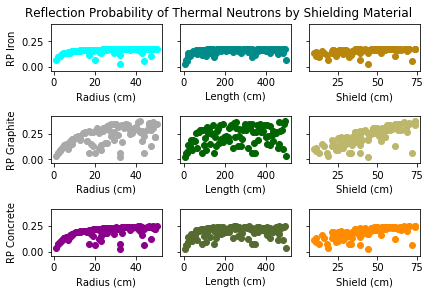

In [9]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,sharey=True)
axs = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
colors = [ '#00FFFF','#008B8B','#B8860B', '#A9A9A9','#006400','#BDB76B',
          '#8B008B','#556B2F','#FF8C00']
labels = ['Radius (cm)','Length (cm)','Shield (cm)']
for i in range(len(axs)):
          if i < 3:
             axs[i].scatter(df.iloc[:,i],df['ReflectionFT'],
                            color=colors[i])
             axs[i].set_facecolor('white')
             axs[i].set_xlabel(labels[i])

          if (i >= 3 and i < 6):
              axs[i].scatter(df.iloc[:,i-3],df['ReflectionGT'],
                             color=colors[i])
              axs[i].set_facecolor('white')
              axs[i].set_xlabel(labels[i-3])
          
          if i >=6 : 
              axs[i].scatter(df.iloc[:,i-6],df['ReflectionCT'],
                             color=colors[i])
              axs[i].set_facecolor('white')
              axs[i].set_xlabel(labels[i-6])


ax1.set_ylabel('RP Iron')
ax4.set_ylabel('RP Graphite')
ax7.set_ylabel('RP Concrete')
plt.suptitle("Reflection Probability of Thermal Neutrons by Shielding Material", y = 1.01)
plt.rcParams["axes.grid"] = True
plt.tight_layout()
#plt.savefig("RP_Ducts.png",bbox_inches='tight',format='png')
plt.figure()
plt.show()

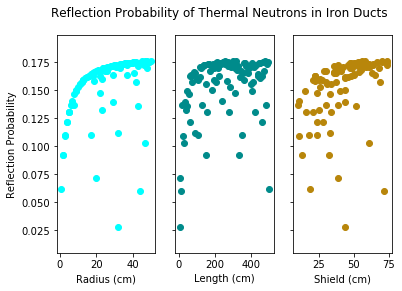

In [10]:
fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,sharey=True)
axs = [ax1,ax2,ax3]
colors = ['#00FFFF','#008B8B','#B8860B']
labels = ['Radius (cm)','Length (cm)','Shield (cm)']
for i in range(len(axs)):
    axs[i].scatter((df.iloc[:,i]),(df['ReflectionFT']),
                   color=colors[i])
    axs[i].set_facecolor('white')
    axs[i].grid(False)
    axs[i].set_xlabel(labels[i])

ax1.set_ylabel('Reflection Probability')
plt.rcParams["axes.grid"] = True
plt.suptitle('Reflection Probability of Thermal Neutrons in Iron Ducts')

plt.figure()
plt.show()

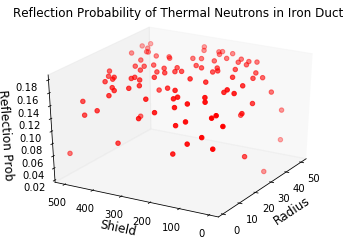

In [12]:
x = df['Radius']
y = df['Length']
z = df['ReflectionFT']
vmax = 100
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d', azim=210)
ax.scatter(x,y,z, color='red')
ax.set_title('Reflection Probability of Thermal Neutrons in Iron Duct',y=1.04)
ax.set_facecolor('white')
ax.grid(False)
ax.set_xlabel('Radius',fontsize=12)
ax.set_ylabel('Shield',fontsize=12)
ax.set_zlabel('Reflection Prob',fontsize=12)
plt.figure()
plt.show()

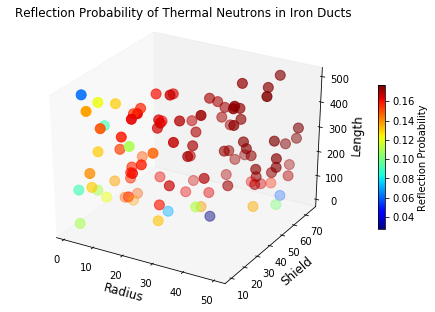

In [13]:

radius = df['Radius']
length = df['Length']
shield = df['Shield'] 
RP = df['ReflectionFT']
cm = plt.get_cmap('jet')
cNorm = matplotlib.colors.Normalize(vmin=min(RP), vmax=max(RP))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(radius, shield,length, c=scalarMap.to_rgba(RP),s=100)
scalarMap.set_array(RP)
fig.colorbar(scalarMap,label='Reflection Probability',shrink=0.5,pad=0.05)
ax.set_xlabel('Radius',fontsize=12)
ax.set_ylabel('Shield',fontsize=12)
ax.set_zlabel('Length',fontsize=12)
ax.set_title('Reflection Probability of Thermal Neutrons in Iron Ducts',y=1.05)
ax.set_facecolor('white')
ax.grid(False)
plt.show()

In [14]:
#transfom dataframe columns to arrays
X = np.array([radius,length,shield])
X= X.reshape(100,3)
y= np.array(RP)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)

In [16]:
linreg = LinearRegression().fit(X_train, y_train)
print('Intercept: {}'.format(linreg.intercept_))
print('Radius Coeff: {}'.format(linreg.coef_[0]))
print('Length Coeff: {}'.format(linreg.coef_[1]))
print('Shield Coeff: {}'.format(linreg.coef_[2]))
print('R-squared score (training set): {}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test set): {}'.format(linreg.score(X_test, y_test)))

Intercept: 0.1516585136738065
Radius Coeff: 2.8268779111253013e-05
Length Coeff: -4.858323584048566e-05
Shield Coeff: 4.938678729921496e-05
R-squared score (training set): 0.08285747753736505
R-squared score (test set): -0.10577209088895256


In [17]:
df2 = pd.DataFrame()
df2['log_radius'] = np.log(radius)
df2['log_length'] = np.log(length)
df2['log_shield'] = np.log(shield)
df2['Reflection Probability'] = df['ReflectionFT']
df2.head()

,log_radius,log_length,log_shield,Reflection Probability
0,3.367296,3.583519,3.784190,0.139221
1,3.713572,4.510860,4.143135,0.165289
2,1.098612,4.663439,3.178054,0.109648
3,3.828641,4.955827,4.304065,0.172234
4,2.890372,6.135565,3.091042,0.162576


In [18]:
X2 = np.array(df2.iloc[:,0:3])
y2= np.array(df2['Reflection Probability'])
print(X2.shape,y2.shape)

(100, 3) (100,)


In [19]:
X2_train,X2_test,y2_train,y2_test= train_test_split(X2,y2,random_state=0)
linreg2 = LinearRegression().fit(X2_train, y2_train)
print('Intercept: {}'.format(linreg2.intercept_))
print('Radius Coeff: {}'.format(linreg2.coef_[0]))
print('Length Coeff: {}'.format(linreg2.coef_[1]))
print('Shield Coeff: {}'.format(linreg2.coef_[2]))
print('R-squared score (training set): {}'.format(linreg2.score(X2_train, y2_train)))
print('R-squared score (test set): {}'.format(linreg2.score(X2_test, y2_test)))

Intercept: 0.009201023548535664
Radius Coeff: 0.013780055744952148
Length Coeff: 0.016412765412551263
Shield Coeff: 0.005055778995546058
R-squared score (training set): 0.6034608799093595
R-squared score (test set): 0.614412093552843


In [20]:
df3 = pd.concat([df.iloc[:,0:3],df2],axis=1)
X3 = np.array(df3.iloc[:,0:6])
y3= np.array(df3['Reflection Probability'])
print(df3.head(),X3.shape,y3.shape)

   Radius  Length  Shield  log_radius  log_length  log_shield  \
0      29      36      44    3.367296    3.583519    3.784190   
1      41      91      63    3.713572    4.510860    4.143135   
2       3     106      24    1.098612    4.663439    3.178054   
3      46     142      74    3.828641    4.955827    4.304065   
4      18     462      22    2.890372    6.135565    3.091042   

   Reflection Probability  
0                0.139221  
1                0.165289  
2                0.109648  
3                0.172234  
4                0.162576   (100, 6) (100,)


In [21]:
X3_train,X3_test,y3_train,y3_test= train_test_split(X3,y3,random_state=0)
linreg3 = LinearRegression().fit(X3_train, y3_train)
print('Intercept: {}'.format(linreg3.intercept_))
print('Radius Coeff: {}'.format(linreg3.coef_[0]))
print('Length Coeff: {}'.format(linreg3.coef_[1]))
print('Shield Coeff: {}'.format(linreg3.coef_[2]))
print('Log Radius Coeff: {}'.format(linreg3.coef_[3]))
print('Log Length Coeff: {}'.format(linreg3.coef_[4]))
print('Log Shield Coeff: {}'.format(linreg3.coef_[5]))
print('R-squared score (training set): {}'.format(linreg3.score(X3_train, y3_train)))
print('R-squared score (test set): {}'.format(linreg3.score(X3_test, y3_test)))

Intercept: -0.07891272030908539
Radius Coeff: -0.0012160136103073497
Length Coeff: -0.00014684930973873296
Shield Coeff: 0.0003783024005277247
Log Radius Coeff: 0.031136266879160882
Log Length Coeff: 0.03718102058467703
Log Shield Coeff: -0.0008811966755963923
R-squared score (training set): 0.7379485635243799
R-squared score (test set): 0.8765256162593799


In [22]:
df4 = pd.DataFrame()
df4['radius_cr'] = radius**(1/3)
df4['length_cr'] = length**(1/3)
df4['shield_cr'] = shield**(1/3)
df4['radius_nir'] = -radius**(1/2)
df4['length_nir'] = -length**(1/2)
df4['shield_nir'] = -shield**(1/2)
df4.head()

,radius_cr,length_cr,shield_cr,radius_nir,length_nir,shield_nir
0,3.072317,3.301927,3.530348,-5.385165,-6.000000,-6.633250
1,3.448217,4.497941,3.979057,-6.403124,-9.539392,-7.937254
2,1.442250,4.732623,2.884499,-1.732051,-10.295630,-4.898979
3,3.583048,5.217103,4.198336,-6.782330,-11.916375,-8.602325
4,2.620741,7.730614,2.802039,-4.242641,-21.494185,-4.690416


In [23]:
df_fx = pd.concat([df4.iloc[:,0:3],df3],axis=1)
df_fx.head()

,radius_cr,length_cr,shield_cr,Radius,Length,Shield,log_radius,log_length,log_shield,Reflection Probability
0,3.072317,3.301927,3.530348,29,36,44,3.367296,3.583519,3.784190,0.139221
1,3.448217,4.497941,3.979057,41,91,63,3.713572,4.510860,4.143135,0.165289
2,1.442250,4.732623,2.884499,3,106,24,1.098612,4.663439,3.178054,0.109648
3,3.583048,5.217103,4.198336,46,142,74,3.828641,4.955827,4.304065,0.172234
4,2.620741,7.730614,2.802039,18,462,22,2.890372,6.135565,3.091042,0.162576


In [24]:
Xf = np.array(df_fx.iloc[:,0:9])
yf= np.array(df_fx['Reflection Probability'])
print(Xf.shape,yf.shape)

(100, 9) (100,)


In [25]:
Xf_train,Xf_test,yf_train,yf_test= train_test_split(Xf,yf,random_state=0)
linregf = LinearRegression().fit(Xf_train, yf_train)
print('Intercept: {}'.format(linregf.intercept_))
print('Radius Coeff: {}'.format(linregf.coef_[0]))
print('Length Coeff: {}'.format(linregf.coef_[1]))
print('Shield Coeff: {}'.format(linregf.coef_[2]))
print('Log Radius Coeff: {}'.format(linregf.coef_[3]))
print('Log Length Coeff: {}'.format(linregf.coef_[4]))
print('Log Shield Coeff: {}'.format(linregf.coef_[5]))
print('CR Radius Coeff: {}'.format(linregf.coef_[3]))
print('CR Length Coeff: {}'.format(linregf.coef_[4]))
print('CR Shield Coeff: {}'.format(linregf.coef_[5]))
print('R-squared score (training set): {}'.format(linregf.score(Xf_train, yf_train)))
print('R-squared score (test set): {}'.format(linregf.score(Xf_test, yf_test)))

Intercept: -0.4222978297482162
Radius Coeff: -0.16823331772619118
Length Coeff: -0.09659384739402721
Shield Coeff: 1.0349825684661738
Log Radius Coeff: 0.0017147490575979499
Log Length Coeff: 0.00026870827141726875
Log Shield Coeff: -0.010689207993424597
CR Radius Coeff: 0.0017147490575979499
CR Length Coeff: 0.00026870827141726875
CR Shield Coeff: -0.010689207993424597
R-squared score (training set): 0.8137645049959573
R-squared score (test set): 0.883640075627418


In [40]:
from sklearn.metrics import r2_score
predict_train = linregf.predict(Xf_train)
predict_test = linregf.predict(Xf_test)
score = r2_score(yf_test, predict_test)
print("Accuracy on Test Set : {:.2f} ".format(100*score),"%")

Accuracy on Test Set : 88.36  %


In [41]:
dfX =  pd.concat([df4,df3],axis=1)
dfX.head()

,radius_cr,length_cr,shield_cr,radius_nir,length_nir,shield_nir,Radius,Length,Shield,log_radius,log_length,log_shield,Reflection Probability
0,3.072317,3.301927,3.530348,-5.385165,-6.000000,-6.633250,29,36,44,3.367296,3.583519,3.784190,0.139221
1,3.448217,4.497941,3.979057,-6.403124,-9.539392,-7.937254,41,91,63,3.713572,4.510860,4.143135,0.165289
2,1.442250,4.732623,2.884499,-1.732051,-10.295630,-4.898979,3,106,24,1.098612,4.663439,3.178054,0.109648
3,3.583048,5.217103,4.198336,-6.782330,-11.916375,-8.602325,46,142,74,3.828641,4.955827,4.304065,0.172234
4,2.620741,7.730614,2.802039,-4.242641,-21.494185,-4.690416,18,462,22,2.890372,6.135565,3.091042,0.162576


In [42]:
Xm = np.array(dfX.iloc[:,0:12])
ym= np.array(dfX['Reflection Probability'])
print(Xm.shape,ym.shape)

(100, 12) (100,)


In [43]:
Xm_train,Xm_test,ym_train,ym_test= train_test_split(Xm,ym,random_state=0)
linregm = LinearRegression().fit(Xm_train, ym_train)
print('Intercept: {}'.format(linregm.intercept_))
print('Radius Coeff: {}'.format(linregm.coef_[0]))
print('Length Coeff: {}'.format(linregm.coef_[1]))
print('Shield Coeff: {}'.format(linregm.coef_[2]))
print('Log Radius Coeff: {}'.format(linregm.coef_[3]))
print('Log Length Coeff: {}'.format(linregm.coef_[4]))
print('Log Shield Coeff: {}'.format(linregm.coef_[5]))
print('CR Radius Coeff: {}'.format(linregm.coef_[6]))
print('CR Length Coeff: {}'.format(linregm.coef_[7]))
print('CR Shield Coeff: {}'.format(linregm.coef_[8]))
print('R Radius Coeff: {}'.format(linregm.coef_[9]))
print('R Length Coeff: {}'.format(linregm.coef_[10]))
print('R Shield Coeff: {}'.format(linregm.coef_[11]))
print('R-squared score (training set): {}'.format(linregm.score(Xm_train, ym_train)))
print('R-squared score (test set): {}'.format(linregm.score(Xm_test, ym_test)))

Intercept: -8.84522560251936
Radius Coeff: -1.6829195401668406
Length Coeff: 0.4145789306121474
Shield Coeff: 16.04362028822127
Log Radius Coeff: -0.5924440994785449
Log Length Coeff: 0.14111872682805027
Log Shield Coeff: 5.013002264490933
CR Radius Coeff: -0.008238805149620804
CR Length Coeff: 0.0010837208248309915
CR Shield Coeff: 0.044184480720184674
R Radius Coeff: 0.36761632174291137
R Length Coeff: -0.02935795825102616
R Shield Coeff: -4.181488224888099
R-squared score (training set): 0.819101869084822
R-squared score (test set): 0.840304559422796


In [44]:
#use df_fx: log + cube_root fxs
from sklearn.neighbors import KNeighborsRegressor

for i in range(6):
    knnreg = KNeighborsRegressor(n_neighbors = i+1).fit(X_train, y_train)
    print('R-squared test score X: {}'.format(knnreg.score(X_test, y_test)))

print('')
for i in range(6):
    knnreg = KNeighborsRegressor(n_neighbors = i+1).fit(Xf_train, yf_train)
    print('R-squared test score Xm: {}'.format(knnreg.score(Xf_test, yf_test)))

print('')
for i in range(6):
    knnreg = KNeighborsRegressor(n_neighbors = i+1).fit(Xm_train, ym_train)
    print('R-squared test score Xf: {}'.format(knnreg.score(Xm_test, ym_test)))  

R-squared test score X: -0.820891830170104
R-squared test score X: -0.6288825661203508
R-squared test score X: -0.2656397216348332
R-squared test score X: -0.2164310512259089
R-squared test score X: -0.10012757615811085
R-squared test score X: -0.09152631634245201

R-squared test score Xm: 0.20660368605262025
R-squared test score Xm: 0.2755489710587088
R-squared test score Xm: 0.3698100932927506
R-squared test score Xm: 0.3982517160665001
R-squared test score Xm: 0.33690958718760833
R-squared test score Xm: 0.3119300559660062

R-squared test score Xf: 0.20660368605262025
R-squared test score Xf: 0.2755489710587088
R-squared test score Xf: 0.3698100932927506
R-squared test score Xf: 0.3982517160665001
R-squared test score Xf: 0.33690958718760833
R-squared test score Xf: 0.3119850192952839


In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

for i in [10,50,100,200,300,500,1000]:
    rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=0)
    rf.fit(Xf_train, yf_train)

    predicted_train = rf.predict(Xf_train)
    predicted_test = rf.predict(Xf_test)
    test_score = r2_score(yf_test, predicted_test)
    
    print('Number of Trees =' + str(i))
    print ('RF accuracy: TRAINING', rf.score(Xf_train,yf_train))
    print ('RF accuracy: TESTING', rf.score(Xf_test,yf_test))

/anaconda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


Number of Trees =10
RF accuracy: TRAINING 0.9397714511667503
RF accuracy: TESTING 0.7664145643726753
Number of Trees =50
RF accuracy: TRAINING 0.964842352108225
RF accuracy: TESTING 0.7680172514694283
Number of Trees =100
RF accuracy: TRAINING 0.9677228701858548
RF accuracy: TESTING 0.7777270114749233
Number of Trees =200
RF accuracy: TRAINING 0.9677016000959663
RF accuracy: TESTING 0.7888840314140144
Number of Trees =300
RF accuracy: TRAINING 0.9666576596931721
RF accuracy: TESTING 0.7911643951166651
Number of Trees =500
RF accuracy: TRAINING 0.9657534245022351
RF accuracy: TESTING 0.7905007329571643
Number of Trees =1000
RF accuracy: TRAINING 0.9670666407371447
RF accuracy: TESTING 0.790021673365703


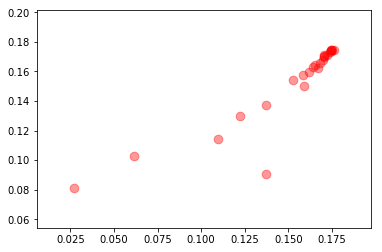

In [47]:
plt.figure()
fig = plt.scatter(yf_test,predicted_test, s=75, alpha=.4)
fig.set_facecolor('red')
plt.grid(False)
plt.show()

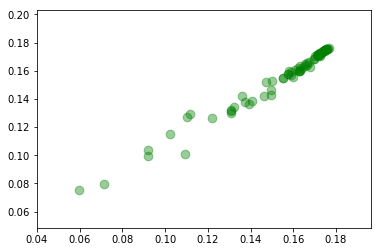

In [48]:
plt.figure()
fig = plt.scatter(yf_train,predicted_train, s=75, alpha=.4)
fig.set_facecolor('green')
plt.grid(False)
plt.show()